In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('final.csv')

In [31]:
df

,State,Year,Grade,Population,Date,Killed_(includes_shooter),Wounded,Total_Injured_Killed_Victims,Number_of_Shots_Fired
0,AK,1982,0,0,1.0,0.0,1.0,1.0,1.0
1,AK,1987,0,0,1.0,1.0,0.0,1.0,1.0
2,AK,1997,0,0,1.0,2.0,2.0,4.0,0.0
3,AK,2000,0,0,1.0,0.0,0.0,0.0,1.0
4,AK,2005,0,0,1.0,0.0,0.0,0.0,0.0
5,AK,2010,0,714015,0.0,0.0,0.0,0.0,0.0
6,AK,2011,0,722259,0.0,0.0,0.0,0.0,0.0
7,AK,2012,F,730825,1.0,0.0,1.0,1.0,0.0
8,AK,2013,F,736760,0.0,0.0,0.0,0.0,0.0
9,AK,2014,F,736759,0.0,0.0,0.0,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 9 columns):
State                           1045 non-null object
Year                            1045 non-null int64
Grade                           1045 non-null object
Population                      1045 non-null object
Date                            1045 non-null float64
Killed_(includes_shooter)       1045 non-null float64
Wounded                         1045 non-null float64
Total_Injured_Killed_Victims    1045 non-null float64
Number_of_Shots_Fired           1045 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 73.6+ KB


In [33]:
#reshape data to take out all the years without grades
df = df[df.Grade != '0']

In [34]:
df = df.reset_index()

In [35]:
df = df.drop(columns=['index'])

In [37]:
#df = df.drop(columns=['level_0'])

In [58]:
df.rename(columns={'Date': 'Incidences', 'Killed_(includes_shooter)': 'Killed'}, inplace=True)

In [59]:
df.head()

,State,Year,Grade,Population,Incidences,Killed,Wounded,Total_Injured_Killed_Victims,Number_of_Shots_Fired
0,AK,2012,F,730825,1.0,0.0,1.0,1.0,0.0
1,AK,2013,F,736760,0.0,0.0,0.0,0.0,0.0
2,AK,2014,F,736759,0.0,0.0,0.0,0.0,0.0
3,AK,2015,F,737979,1.0,0.0,2.0,2.0,0.0
4,AK,2016,F,741522,1.0,0.0,1.0,1.0,1.0


In [43]:
#strip the commas out of Population to be able to turn them from strings into ints
df['Population'] = df['Population'].str.replace(',', '')
df = df.apply(pd.to_numeric, errors='ignore')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
State                           350 non-null object
Year                            350 non-null int64
Grade                           350 non-null object
Population                      350 non-null int64
Incidences                      350 non-null float64
Killed_(includes_shooter)       350 non-null float64
Wounded                         350 non-null float64
Total_Injured_Killed_Victims    350 non-null float64
Number_of_Shots_Fired           350 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 24.7+ KB


In [76]:
df.to_csv('Grades.Pop.Incidences.csv')

In [45]:
corr = df.corr()

In [46]:
corr

,Year,Population,Incidences,Killed_(includes_shooter),Wounded,Total_Injured_Killed_Victims,Number_of_Shots_Fired
Year,1.000000,0.012608,0.282206,0.039904,0.200657,0.150130,0.200004
Population,0.012608,1.000000,0.505394,0.224768,0.412356,0.380221,0.417784
Incidences,0.282206,0.505394,1.000000,0.390965,0.629595,0.604528,0.842308
Killed_(includes_shooter),0.039904,0.224768,0.390965,1.000000,0.502853,0.828231,0.223983
Wounded,0.200657,0.412356,0.629595,0.502853,1.000000,0.900861,0.408220
Total_Injured_Killed_Victims,0.150130,0.380221,0.604528,0.828231,0.900861,1.000000,0.377145
Number_of_Shots_Fired,0.200004,0.417784,0.842308,0.223983,0.408220,0.377145,1.000000


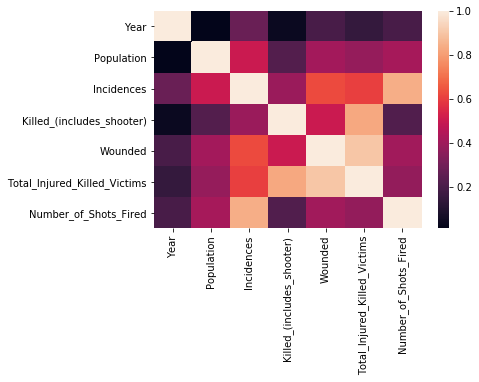

In [47]:
sns.heatmap(corr)

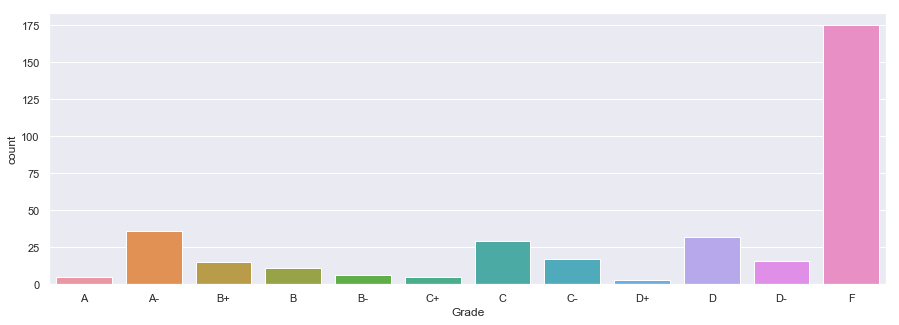

In [49]:
g = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
sns.set()
plt.figure(figsize=(15,5))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.8})
sns.set_palette("colorblind")
sax = sns.countplot(x="Grade", data=df, order = g)
plt.show()

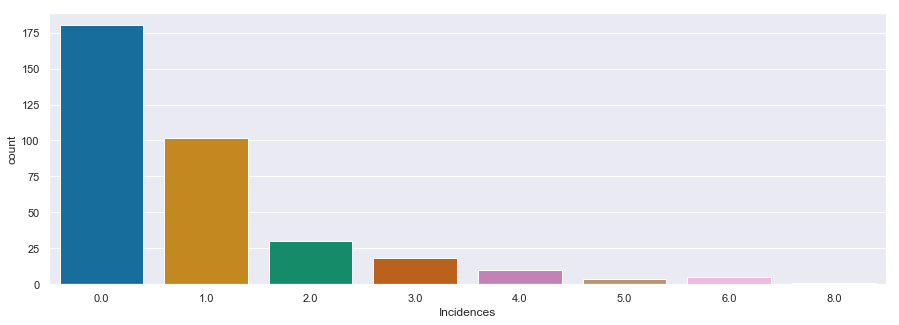

In [52]:
sns.set()
plt.figure(figsize=(15,5))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.8})
sns.set_palette("colorblind")
sax = sns.countplot(x="Incidences", data=df)
plt.show()

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Incidences~Year", data=df).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     30.11
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           7.86e-08
Time:                        11:21:07   Log-Likelihood:                -578.26
No. Observations:                 350   AIC:                             1161.
Df Residuals:                     348   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -373.3171     68.194     -5.474      0.000    -507.440    -239.194
Year           0.1857      0.034      5.488      0.000       0.119       0.252
==============================================================================
Omnibus:                      150.788   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.264
Skew:                           1.925   Prob(JB):                    1.33e-122
Kurtosis:                       7.865   Cond. No.                     2.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Incidences~Population", data=df).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     119.4
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           4.32e-24
Time:                        11:21:27   Log-Likelihood:                -541.17
No. Observations:                 350   AIC:                             1086.
Df Residuals:                     348   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3000      0.082      3.668      0.000       0.139       0.461
Population  9.323e-08   8.53e-09     10.926      0.000    7.65e-08     1.1e-07
==============================================================================
Omnibus:                       90.709   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.562
Skew:                           1.162   Prob(JB):                     5.35e-61
Kurtosis:                       6.692   Cond. No.                     1.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Incidences~Killed", data=df).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     62.79
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.14e-14
Time:                        11:23:08   Log-Likelihood:                -563.75
No. Observations:                 350   AIC:                             1132.
Df Residuals:                     348   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7675      0.067     11.460      0.000       0.636       0.899
Killed         0.2522      0.032      7.924      0.000       0.190       0.315
==============================================================================
Omnibus:                      120.749   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.600
Skew:                           1.308   Prob(JB):                    3.34e-157
Kurtosis:                       9.525   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Incidences~Wounded", data=df).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     228.5
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           4.80e-40
Time:                        11:23:36   Log-Likelihood:                -504.44
No. Observations:                 350   AIC:                             1013.
Df Residuals:                     348   BIC:                             1021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6176      0.058     10.676      0.000       0.504       0.731
Wounded        0.3146      0.021     15.117      0.000       0.274       0.355
==============================================================================
Omnibus:                      179.747   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1258.103
Skew:                           2.056   Prob(JB):                    6.40e-274
Kurtosis:                      11.328   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Incidences~Total_Injured_Killed_Victims", data=df).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     200.4
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           2.99e-36
Time:                        11:24:26   Log-Likelihood:                -513.18
No. Observations:                 350   AIC:                             1030.
Df Residuals:                     348   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.6224      0.059     10.469      0.000       0.505       0.739
Total_Injured_Killed_Victims     0.1958      0.014     14.157      0.000       0.169       0.223
==============================================================================
Omnibus:                      142.232   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.958
Skew:                           1.537   Prob(JB):                    1.60e-213
Kurtosis:                      10.599   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_reg_simple = ols(formula= "Incidences~Number_of_Shots_Fired", data=df).fit()
df_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     849.9
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.98e-95
Time:                        11:24:51   Log-Likelihood:                -376.46
No. Observations:                 350   AIC:                             756.9
Df Residuals:                     348   BIC:                             764.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2742      0.044      6.286      0.000       0.188       0.360
Number_of_Shots_Fired     1.2318      0.042     29.152      0.000       1.149       1.315
==============================================================================
Omnibus:                      184.406   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.418
Skew:                           2.233   Prob(JB):                    4.81e-224
Kurtosis:                      10.112   Cond. No.                         1.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# turning Grades into dummy variables
grade_dummy = pd.get_dummies(df['Grade'],prefix = 'Grade')

In [66]:
grade_dummy.head()

,Grade_A,Grade_A-,Grade_B,Grade_B+,Grade_B-,Grade_C,Grade_C+,Grade_C-,Grade_D,Grade_D+,Grade_D-,Grade_F
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
#renaming the columns so that they work with OLS
# '-' becomes 'm'
# '+' becomes 'p'
grade_dummy = grade_dummy.rename(columns={'Grade_A-': 'Grade_Am', 'Grade_B+': 'Grade_Bp', 'Grade_B-': 'Grade_Bm','Grade_C+': 'Grade_Cp', 'Grade_C-': 'Grade_Cm', 'Grade_D+': 'Grade_Dp', 'Grade_D-': 'Grade_Dm'})

In [68]:
grade_dummy.head()

,Grade_A,Grade_Am,Grade_B,Grade_Bp,Grade_Bm,Grade_C,Grade_Cp,Grade_Cm,Grade_D,Grade_Dp,Grade_Dm,Grade_F
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
df_with_dummies = pd.concat([df, grade_dummy], axis = 1)
df_with_dummies = df_with_dummies.drop(['Grade','Grade_F'],axis=1);

In [72]:
df_with_dummies.head()

,State,Year,Population,Incidences,Killed,Wounded,Total_Injured_Killed_Victims,Number_of_Shots_Fired,Grade_A,Grade_Am,Grade_B,Grade_Bp,Grade_Bm,Grade_C,Grade_Cp,Grade_Cm,Grade_D,Grade_Dp,Grade_Dm
0,AK,2012,730825,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,AK,2013,736760,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,AK,2014,736759,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,AK,2015,737979,1.0,0.0,2.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,AK,2016,741522,1.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 19 columns):
State                           350 non-null object
Year                            350 non-null int64
Population                      350 non-null int64
Incidences                      350 non-null float64
Killed                          350 non-null float64
Wounded                         350 non-null float64
Total_Injured_Killed_Victims    350 non-null float64
Number_of_Shots_Fired           350 non-null float64
Grade_A                         350 non-null uint8
Grade_Am                        350 non-null uint8
Grade_B                         350 non-null uint8
Grade_Bp                        350 non-null uint8
Grade_Bm                        350 non-null uint8
Grade_C                         350 non-null uint8
Grade_Cp                        350 non-null uint8
Grade_Cm                        350 non-null uint8
Grade_D                         350 non-null uint8
Grade_Dp         

In [75]:
#OLS Regression of Number of Incidences vs Gun Law Grade
df_reg_mult_dummy = ols(formula="Incidences~Grade_A+Grade_Am+Grade_B+Grade_Bp+Grade_Bm+Grade_C+Grade_Cp+Grade_Cm+Grade_D+Grade_Dp+Grade_Dm",
                               data=df_with_dummies).fit()
df_reg_mult_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Incidences   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.392
Date:                Thu, 07 Mar 2019   Prob (F-statistic):              0.175
Time:                        11:41:47   Log-Likelihood:                -585.03
No. Observations:                 350   AIC:                             1194.
Df Residuals:                     338   BIC:                             1240.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8343      0.099      8.425      0.000       0.640       1.029
Grade_A        1.7657      0.594      2.972      0.003       0.597       2.934
Grade_Am      -0.2510      0.240     -1.047      0.296      -0.723       0.221
Grade_B       -0.1979      0.407     -0.486      0.627      -0.999       0.603
Grade_Bp       0.1657      0.352      0.470      0.639      -0.528       0.859
Grade_Bm      -0.0010      0.544     -0.002      0.999      -1.071       1.069
Grade_C        0.3726      0.263      1.419      0.157      -0.144       0.889
Grade_Cp       0.7657      0.594      1.289      0.198      -0.403       1.934
Grade_Cm      -0.0696      0.333     -0.209      0.835      -0.724       0.585
Grade_D        0.1032      0.252      0.410      0.682      -0.392       0.599
Grade_Dp       0.4990      0.763      0.654      0.513      -1.001       1.999
Grade_Dm       0.2282      0.342      0.667      0.505      -0.445       0.901
==============================================================================
Omnibus:                      154.579   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.657
Skew:                           1.974   Prob(JB):                    6.70e-128
Kurtosis:                       7.957   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""